# ALLOW INTER ACTIVITY

In [9]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
!wget -O mouse-sizing-n-cropping-files/postoid.jpg https://jacknorthrup.com/postoids/postoid%20%2810%29.jpg

--2018-09-07 11:56:47--  https://jacknorthrup.com/postoids/postoid%20%2810%29.jpg
Resolving jacknorthrup.com (jacknorthrup.com)... 192.250.236.207
Connecting to jacknorthrup.com (jacknorthrup.com)|192.250.236.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53119 (52K) [image/jpeg]
Saving to: ‘mouse-sizing-n-cropping-files/postoid.jpg’

mouse-sizing-n-crop 100%[===================>]  51.87K  2.45KB/s    in 21s     

2018-09-07 11:57:23 (2.45 KB/s) - ‘mouse-sizing-n-cropping-files/postoid.jpg’ saved [53119/53119]



In [6]:
from PIL import Image
im=Image.open('mouse-sizing-n-cropping-files/postoid.jpg')
im.size # (width,height) tuple

(294, 417)

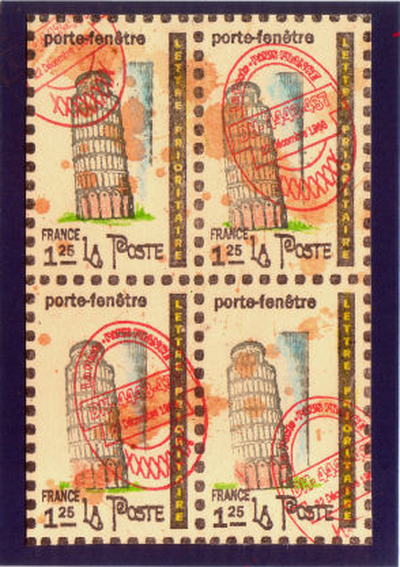

In [12]:
import PIL
from PIL import Image

basewidth = 400
img = Image.open("mouse-sizing-n-cropping-files/postoid.jpg")
wpercent = (basewidth / float(img.size[0]))
hsize = int((float(img.size[1]) * float(wpercent)))
img = img.resize((basewidth, hsize), PIL.Image.ANTIALIAS)
img.save("mouse-sizing-n-cropping-files/postoid400.jpg")
img

In [ ]:
http://stackoverflow.com/questions/6136588/image-cropping-using-python
http://2017.compciv.org/guide/topics/python-nonstandard-libraries/pillow.html

In [10]:
!wget -O mouse-sizing-n-cropping-files/soil.jpg https://static.pexels.com/photos/60013/desert-drought-dehydrated-clay-soil-60013.jpeg

--2018-09-07 12:03:00--  https://static.pexels.com/photos/60013/desert-drought-dehydrated-clay-soil-60013.jpeg
Resolving static.pexels.com (static.pexels.com)... 104.16.239.112, 104.16.240.112, 104.16.242.112, ...
Connecting to static.pexels.com (static.pexels.com)|104.16.239.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 868458 (848K) [image/jpeg]
Saving to: ‘mouse-sizing-n-cropping-files/soil.jpg’

mouse-sizing-n-crop 100%[===================>] 848.10K  36.2KB/s    in 14s     

2018-09-07 12:03:15 (58.5 KB/s) - ‘mouse-sizing-n-cropping-files/soil.jpg’ saved [868458/868458]



In [13]:
from PIL import Image
im=Image.open('mouse-sizing-n-cropping-files/soil.jpg')
im.size # (width,height) tuple

(2200, 1500)

In [30]:
import PIL
from PIL import Image

basewidth = 600
img = Image.open("mouse-sizing-n-cropping-files/soil.jpg")
wpercent = (basewidth / float(img.size[0]))
hsize = int((float(img.size[1]) * float(wpercent)))
img = img.resize((basewidth, hsize), PIL.Image.ANTIALIAS)
img.save("mouse-sizing-n-cropping-files/soil600.jpg")

In [31]:
from PIL import Image
im=Image.open("mouse-sizing-n-cropping-files/soil600.jpg")
im.size # (width,height) tuple

(600, 409)

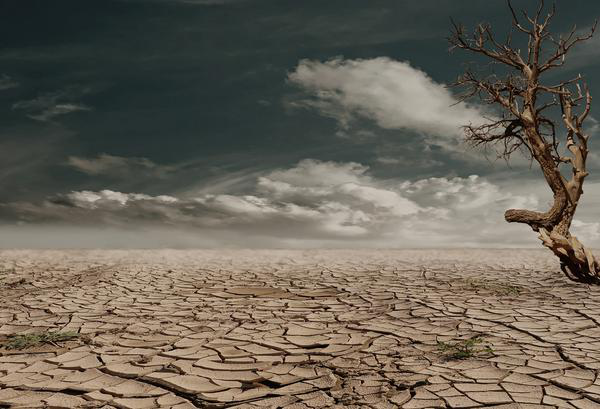

In [32]:
from PIL import Image
im=Image.open("mouse-sizing-n-cropping-files/soil600.jpg")
im # (display image)

In [16]:
def add_cursor(fig, ax):
    plt.close(fig)

    vline = ax.axvline(1, color='k')
    hline = ax.axhline(0.5, color='k')

    def set_cursor(x, y):
        vline.set_xdata((x, x))
        hline.set_ydata((y, y))
        display(fig)

    interact(set_cursor, x=ax.get_xlim(), y=ax.get_ylim())

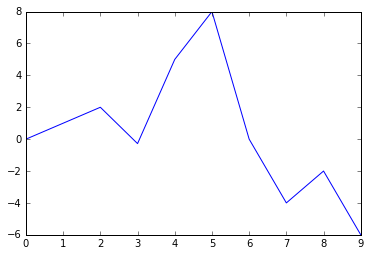

In [17]:
#import ipympl
from math import sin
import matplotlib.pyplot as plt
%matplotlib inline 
x = (sin(6))
plt.plot([0, 1, 2, x, 5, 8,0,-4, -2, -6])
plt.show()


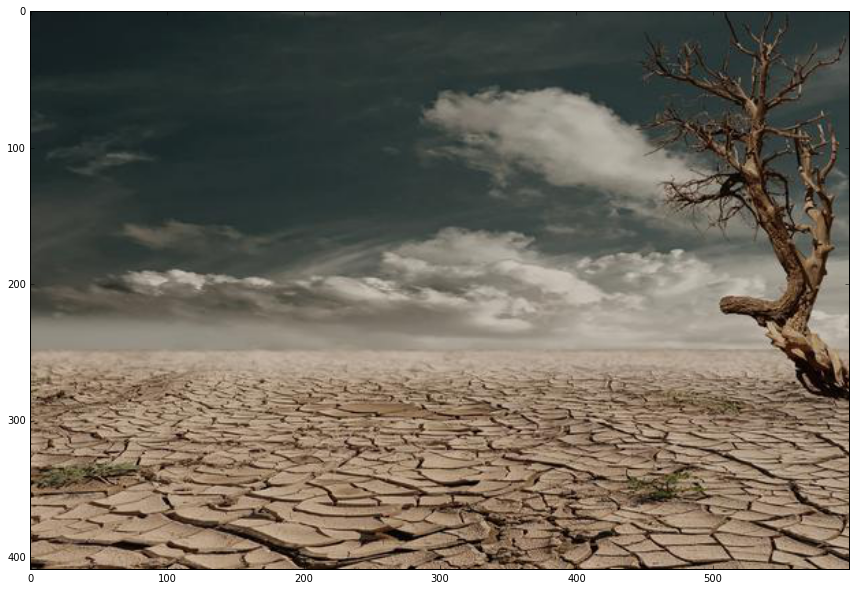

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = (20.0, 10.0)
import matplotlib.image as mpimg
import numpy as np
img=mpimg.imread('mouse-sizing-n-cropping-files/soil600.jpg')
imgplot = plt.imshow(img)


In [34]:
from PIL import Image
img = Image.open('mouse-sizing-n-cropping-files/soil600.jpg')
crop_specs = (145, 50, img.width - 40, img.height - 135)
crop_img = img.crop(crop_specs)
crop_img.save('mouse-sizing-n-cropping-files/soil-cropped.png')   

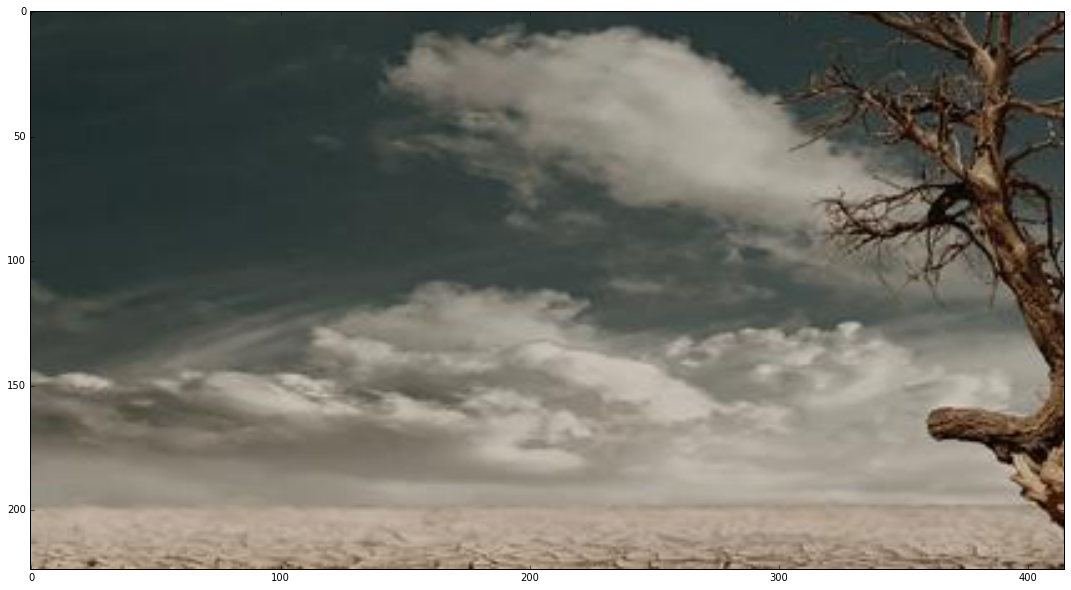

In [35]:
img=mpimg.imread('mouse-sizing-n-cropping-files/soil-cropped.png')
imgplot = plt.imshow(img)

In [36]:
from PIL import Image
im=Image.open('mouse-sizing-n-cropping-files/soil-cropped.png')
im.size # (width,height) tuple

(415, 224)

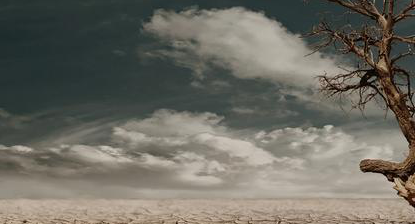

In [37]:
from PIL import Image
im=Image.open('mouse-sizing-n-cropping-files/soil-cropped.png')
im

In [ ]:
http://mpld3.github.io/

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.path as mpath
import matplotlib.patches as mpatches

import mpld3
from mpld3 import plugins, utils


class LinkedDragPlugin(plugins.PluginBase):
    JAVASCRIPT = r"""
    mpld3.register_plugin("drag", DragPlugin);
    DragPlugin.prototype = Object.create(mpld3.Plugin.prototype);
    DragPlugin.prototype.constructor = DragPlugin;
    DragPlugin.prototype.requiredProps = ["idpts", "idline", "idpatch"];
    DragPlugin.prototype.defaultProps = {}
    function DragPlugin(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };

    DragPlugin.prototype.draw = function(){
        var patchobj = mpld3.get_element(this.props.idpatch, this.fig);
        var ptsobj = mpld3.get_element(this.props.idpts, this.fig);
        var lineobj = mpld3.get_element(this.props.idline, this.fig);

        var drag = d3.behavior.drag()
            .origin(function(d) { return {x:ptsobj.ax.x(d[0]),
                                          y:ptsobj.ax.y(d[1])}; })
            .on("dragstart", dragstarted)
            .on("drag", dragged)
            .on("dragend", dragended);

        lineobj.path.attr("d", lineobj.datafunc(ptsobj.offsets));
        patchobj.path.attr("d", patchobj.datafunc(ptsobj.offsets,
                                                  patchobj.pathcodes));
        lineobj.data = ptsobj.offsets;
        patchobj.data = ptsobj.offsets;

        ptsobj.elements()
           .data(ptsobj.offsets)
           .style("cursor", "default")
           .call(drag);

        function dragstarted(d) {
          d3.event.sourceEvent.stopPropagation();
          d3.select(this).classed("dragging", true);
        }

        function dragged(d, i) {
          d[0] = ptsobj.ax.x.invert(d3.event.x);
          d[1] = ptsobj.ax.y.invert(d3.event.y);
          d3.select(this)
            .attr("transform", "translate(" + [d3.event.x,d3.event.y] + ")");
          lineobj.path.attr("d", lineobj.datafunc(ptsobj.offsets));
          patchobj.path.attr("d", patchobj.datafunc(ptsobj.offsets,
                                                    patchobj.pathcodes));
        }

        function dragended(d, i) {
          d3.select(this).classed("dragging", false);
        }
    }

    mpld3.register_plugin("drag", DragPlugin);
    """

    def __init__(self, points, line, patch):
        if isinstance(points, mpl.lines.Line2D):
            suffix = "pts"
        else:
            suffix = None

        self.dict_ = {"type": "drag",
                      "idpts": utils.get_id(points, suffix),
                      "idline": utils.get_id(line),
                      "idpatch": utils.get_id(patch)}


fig, ax = plt.subplots()

Path = mpath.Path
path_data = [
    (Path.MOVETO, (1.58, -2.57)),
    (Path.CURVE4, (0.35, -1.1)),
    (Path.CURVE4, (-1.75, 2.0)),
    (Path.CURVE4, (0.375, 2.0)),
    (Path.LINETO, (0.85, 1.15)),
    (Path.CURVE4, (2.2, 3.2)),
    (Path.CURVE4, (3, 0.05)),
    (Path.CURVE4, (2.0, -0.5)),
    (Path.CLOSEPOLY, (1.58, -2.57)),
    ]
codes, verts = zip(*path_data)
path = mpath.Path(verts, codes)
patch = mpatches.PathPatch(path, facecolor='r', alpha=0.5)
ax.add_patch(patch)

# plot control points and connecting lines
x, y = zip(*path.vertices[:-1])
points = ax.plot(x, y, 'go', ms=10)
line = ax.plot(x, y, '-k')

ax.grid(True, color='gray', alpha=0.5)
ax.axis('equal')
ax.set_title("Drag Points to Change Path", fontsize=18)

plugins.connect(fig, LinkedDragPlugin(points[0], line[0], patch))

mpld3.display()

import matplotlib.pyplot as plt
import numpy as np
import mpld3
from mpld3 import plugins

fig, ax = plt.subplots()

x = np.linspace(-2, 2, 20)
y = x[:, None]
X = np.zeros((20, 20, 4))

X[:, :, 0] = np.exp(- (x - 1) ** 2 - (y) ** 2)
X[:, :, 1] = np.exp(- (x + 0.71) ** 2 - (y - 0.71) ** 2)
X[:, :, 2] = np.exp(- (x + 0.71) ** 2 - (y + 0.71) ** 2)
X[:, :, 3] = np.exp(-0.25 * (x ** 2 + y ** 2))

im = ax.imshow(X, extent=(10, 20, 10, 20),
               origin='lower', zorder=1, interpolation='nearest')
fig.colorbar(im, ax=ax)

ax.set_title('An Image', size=20)

plugins.connect(fig, plugins.MousePosition(fontsize=14))

mpld3.display()


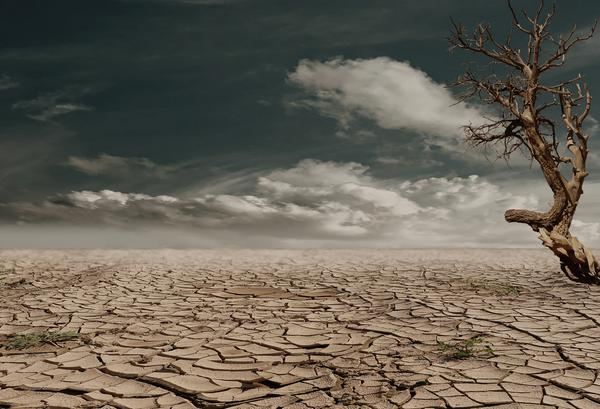

In [38]:
class ImageFile(object):
    """Class for storing an image location."""
    def __init__(self, fpath):
        self.fpath = fpath
    def _repr_png_(self):
        return open(self.fpath, 'r').read()
ImageFile('mouse-sizing-n-cropping-files/soil600.jpg')

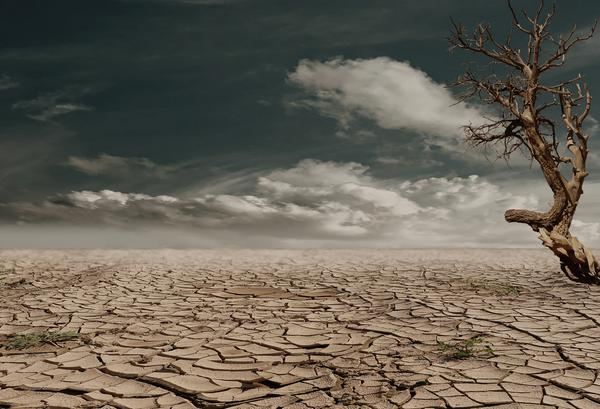

In [39]:
from IPython.display import Image
image = Image('mouse-sizing-n-cropping-files/soil600.jpg')
image


In [11]:
class ImageFile(object):
    """Class for storing an image location."""

    def __init__(self, fpath):
        self.fpath = fpath
        self.format = fpath.split('.')[-1]

    def _repr_png_(self):
        if self.format == 'png':
            return open(self.fpath, 'r').read()

    def _repr_jpeg_(self):
        if self.format == 'jpeg' or self.format == 'jpg':
            return open(self.fpath, 'r').read()

    def _repr_svg_(self):
        if self.format == 'svg':
            return open(self.fpath, 'r').read()



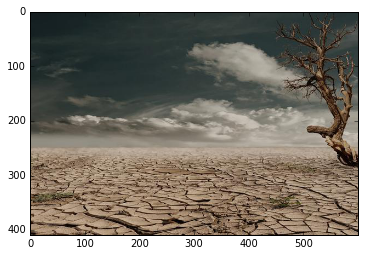

In [40]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

im = np.array(Image.open('mouse-sizing-n-cropping-files/soil600.jpg'))
plt.imshow(im)
plt.show()

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import mpld3
%matplotlib inline  
from mpld3 import plugins
from PIL import Image
img=Image.open("mouse-sizing-n-cropping-files/soil600.jpg")
 

fig, ax = plt.subplots()
im = ax.imshow(img, extent=(10, 20, 10, 20),
               origin='lower', zorder=1, interpolation='nearest')

plugins.connect(fig, plugins.MousePosition(fontsize=14))
mpld3.display()
from PIL import Image


im = np.array(Image.open('mouse-sizing-n-cropping-files/soil600.jpg'))



In [53]:
import matplotlib
import numpy as np
import mpld3
import matplotlib.pyplot as plt
from PIL import Image
from mpld3 import plugins
%matplotlib inline
fig, ax = plt.subplots()
im = np.array(Image.open('mouse-sizing-n-cropping-files/soil600.jpg'))
# Default shows the image upside down [::-1] flips the image
im = im[::-1]
plt.imshow(im)
plugins.connect(fig, plugins.MousePosition(fontsize=14))

mpld3.display()

In [ ]:
!sudo locate manilyn.jpg

In [44]:
from PIL import Image
img = Image.open('mouse-sizing-n-cropping-files/soil600.jpg')
crop_specs = (200, 0, img.width - 150, img.height - 0)
crop_img = img.crop(crop_specs)
crop_img.save('mouse-sizing-n-cropping-files/cropsoil600.jpg')   

In [52]:
import matplotlib
import numpy as np
import mpld3
import matplotlib.pyplot as plt
from PIL import Image
from mpld3 import plugins
%matplotlib inline
fig, ax = plt.subplots()
im = np.array(Image.open('mouse-sizing-n-cropping-files/cropsoil600.jpg'))
# Default shows the image upside down [::-1] flips the image
im = im[::-1]
plt.imshow(im)
plugins.connect(fig, plugins.MousePosition(fontsize=14))

mpld3.display()

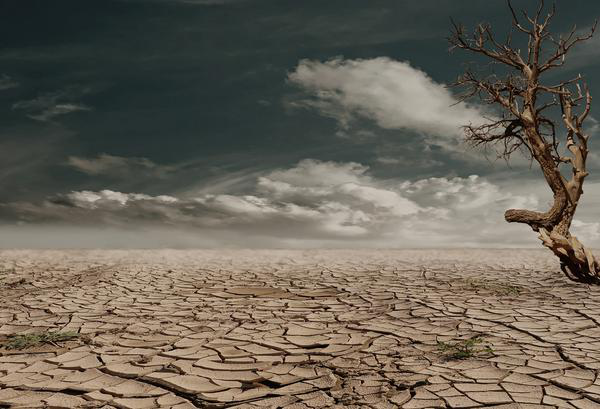

In [47]:
im = Image.open('mouse-sizing-n-cropping-files/soil600.jpg')
im

In [49]:
#Python 2.7 - Linux
from PIL import Image
# open an image file (.jpg or.png)
im1 = Image.open('mouse-sizing-n-cropping-files/soil600.jpg')
# multiply each pixel by a variable - less than 1 is darker greater than 1 is lighter
# works best with .jpg and .png images
im2 = im1.point(lambda p: p * 1.8) # lighter
im3 = im1.point(lambda p: p * .5)  # Darker

# This pops up your defaultimage viewer
im1.show()
im2.show()
im3.show()
# save modified image 
im2.save("mouse-sizing-n-cropping-files/soil-light.jpg")
im3.save("mouse-sizing-n-cropping-files/soil-dark.jpg")


In [51]:
import matplotlib
import numpy as np
import mpld3
import matplotlib.pyplot as plt
from PIL import Image
from mpld3 import plugins
%matplotlib inline
fig, ax = plt.subplots()
im = np.array(Image.open('mouse-sizing-n-cropping-files/soil600.jpg'))
# Default shows the image upside down [::-1] flips the image
im = im[::-1]
plt.imshow(im)
plugins.connect(fig, plugins.MousePosition(fontsize=14))


mpld3.display()

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 3, 3, 3],
        [0, 0, 0, ..., 3, 3, 3],
        [0, 0, 0, ..., 3, 3, 3]], dtype=uint8),
 array([[2.91637405e-01, 2.22763911e-01, 8.28828910e-02, 2.13869847e-01,
         1.88845946e-01, 5.47872978e+01, 5.67463452e+01, 4.65542592e+01,
         1.41909653e+02, 1.60631859e+02, 1.77368995e+02, 3.03311103e+01,
         3.40262395e+01, 3.17098890e+01, 6.84685084e+01, 8.22520391e+01,
         9.24380866e+01, 1.13276751e+02, 1.30341747e+02, 1.44722049e+02,
         4.54642735e+01, 5.27548311e+01, 6.39499334e+01, 5.27548311e+01,
         6.40179219e+01, 7.91706214e+01, 6.39499334e+01, 7.91706214e+01,
         1.02755453e+02, 2.26297455e+02, 1.59898400e+02, 7.75185916e+01,
         1.59898400e+02, 1.28246281e+02, 8.73682587e+01, 7.75185916e+01,
         8.73682587e+01, 1.09660369e+02, 2.75435493e+02, 2.20613900e+02,
         1.80135135e+01, 2.20613900e+02, 2.0

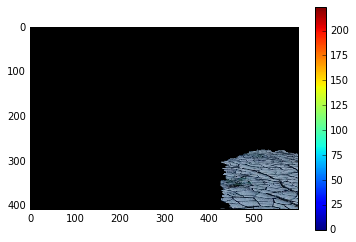

In [54]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('mouse-sizing-n-cropping-files/soil600.jpg')
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (425,107,686,454)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

plt.imshow(img)
plt.colorbar()
plt.show()

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import mpld3
#%matplotlib inline  
from mpld3 import plugins
from PIL import Image
fig, ax = plt.subplots()

plugins.connect(fig, plugins.MousePosition(fontsize=14))
mpld3.display()

# -----------------------------------------------

In [56]:
!wget -O mouse-sizing-n-cropping-files/jungle.jpg https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Brooklyn_Museum_-_In_the_Jungle%2C_Florida_-_Winslow_Homer_-_overall.jpg/800px-Brooklyn_Museum_-_In_the_Jungle%2C_Florida_-_Winslow_Homer_-_overall.jpg

--2018-09-07 12:59:37--  https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Brooklyn_Museum_-_In_the_Jungle%2C_Florida_-_Winslow_Homer_-_overall.jpg/800px-Brooklyn_Museum_-_In_the_Jungle%2C_Florida_-_Winslow_Homer_-_overall.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 103.102.166.240, 2001:df2:e500:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|103.102.166.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 140214 (137K) [image/jpeg]
Saving to: ‘mouse-sizing-n-cropping-files/jungle.jpg’

mouse-sizing-n-crop 100%[===================>] 136.93K   242KB/s    in 0.6s    

2018-09-07 12:59:38 (242 KB/s) - ‘mouse-sizing-n-cropping-files/jungle.jpg’ saved [140214/140214]



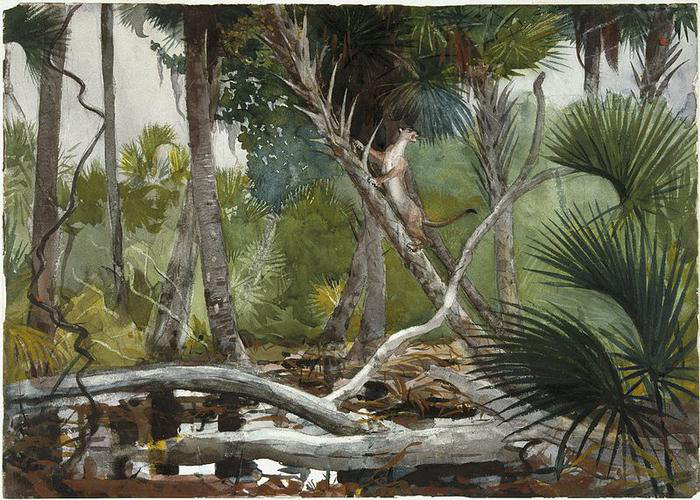

In [63]:
import PIL
from PIL import Image
im1 = Image.open("mouse-sizing-n-cropping-files/jungle.jpg")
#longer_side = max(im1.size)
basewidth = 700
hsize = 500
img = im1.resize((basewidth, hsize), PIL.Image.ANTIALIAS)
img.save("mouse-sizing-n-cropping-files/jungle700.jpg")
im = Image.open("mouse-sizing-n-cropping-files/jungle700.jpg")
im

# Gives a popup window Points Clicked will be recorded

In [80]:
import Tkinter
from PIL import Image, ImageTk
from sys import argv

window = Tkinter.Tk(className="bla")

image = Image.open("mouse-sizing-n-cropping-files/jungle700.jpg")
canvas = Tkinter.Canvas(window, width=image.size[0], height=image.size[1])
canvas.pack()
image_tk = ImageTk.PhotoImage(image)
canvas.create_image(image.size[0]//2, image.size[1]//2, image=image_tk)

def callback(event):
    #print "[",event.x,"],["+event.y,"]"
    print "[",event.x,",",event.y,"],",
 
canvas.bind("<Button-1>", callback)
Tkinter.mainloop()

1

'140238878541136callback'

[ 320 , 123 ], [ 437 , 121 ], [ 451 , 267 ], [ 356 , 277 ],


In [67]:
poly = np.array([ [ 320 , 123 ], [ 437 , 121 ], [ 451 , 267 ], [ 356 , 277 ],[ 321 , 125 ] ], np.int32)
print poly

[[269  24]
 [273 117]
 [301 145]
 [345 199]
 [398 273]
 [428 317]
 [447 278]
 [440 231]
 [487 220]
 [491 202]
 [437 209]
 [415 162]
 [433 126]
 [410 113]
 [360 115]
 [363  73]
 [317  25]]


## USING those " Points Clicked "

In [70]:
import cv2
import numpy as np 

In [69]:
import cv2
import numpy as np 

# Read images
dst = cv2.imread("mouse-sizing-n-cropping-files/soil600.jpg")

src = cv2.imread("mouse-sizing-n-cropping-files/jungle700.jpg")
src_mask = np.zeros(src.shape, src.dtype)

src_mask = np.zeros(src.shape, src.dtype)

poly = np.array([ [ 269 , 24 ], [ 273 , 117 ], [ 301 , 145 ], [ 345 , 199 ], 
[ 398 , 273 ], [ 428 , 317 ], [ 447 , 278 ], [ 440 , 231 ], [ 487 , 220 ], [ 491 , 202 ],
[ 437 , 209 ], [ 415 , 162 ], [ 433 , 126 ], [ 410 , 113 ], [ 360 , 115 ], [ 363 , 73 ], [ 317 , 25 ] ], np.int32)



cv2.fillPoly(src_mask, [poly], (255, 255, 255))

# This is where the CENTER of the airplane will be placed
center = (550,275)

# Clone seamlessly.
output = cv2.seamlessClone(src, dst, src_mask, center, cv2.NORMAL_CLONE)

# Write result
cv2.imwrite("mouse-sizing-n-cropping-files/soil-jungle.jpg", output);


error: /io/opencv/modules/photo/src/seamless_cloning.cpp:94: error: (-215) minxd >= 0 && minyd >= 0 && maxxd <= dest.rows && maxyd <= dest.cols in function seamlessClone


In [82]:
import cv2
import numpy as np 

# Read images
#dst = cv2.imread("01-ajungle2.jpg")
#dst = cv2.imread("/notebooks/edge-preserving-normalized-convolution-filter.jpg")
#src = cv2.imread("/notebooks/learnopencv/SeamlessCloning/images/airplane.jpg")
#src = cv2.imread("desert-drought.jpg")
dst = cv2.imread("mouse-sizing-n-cropping-files/soil600.jpg")
src = cv2.imread("mouse-sizing-n-cropping-files/jungle700.jpg")
#src = cv2.imread("mouse-sizing-n-cropping-files/soil600.jpg")
#dst = cv2.imread("mouse-sizing-n-cropping-files/jungle700.jpg")
# Create a rough mask around the airplane.
src_mask = np.zeros(src.shape, src.dtype)
#poly = np.array([ [4,80], [30,54], [151,63], [254,37], [298,90], [272,134], [43,122] ], np.int32)
poly = np.array([ [ 320 , 123 ], [ 437 , 121 ], [ 451 , 267 ], [ 356 , 277 ],[ 321 , 125 ] ], np.int32)
#poly = np.array([ [1,100], [1,50], [151,63], [254,37], [298,90], [272,134], [43,122] ], np.int32)
#poly = np.array([ [736, 113],[768, 97],[784, 93],[788, 157],[789, 197],[788, 225],[777, 265],[768, 301],[778, 318],\
#[794, 332],[767, 386],[743, 348],[707, 314],[693, 304],[666, 299],[668, 275],[705, 273],[729, 272],\
#[716, 223],[706, 236],[689, 207],[687, 217],[687, 231],[667, 217],[647, 226],[629, 208],[614, 207],\
#[615, 198],[602, 183],[607, 174],[609, 159],[636, 162],[640, 146],[634, 137],[597, 153],[594, 137],\
#[601, 122],[583, 115],[611, 83],[626, 78],[622, 72],[589, 73],[583, 51],[591, 13],[605, 10],[631, 28],\
#[650, 17],[666, 39],[681, 18],[699, 4],[728, 6],[751, 7],[743, 39],[794, 13],[797, 42],[764, 66],\
#[735, 101],[736, 113] ], np.int32)




cv2.fillPoly(src_mask, [poly], (255, 255, 255))

# This is where the CENTER of the airplane will be placed
center = (250,275)

# Clone seamlessly.
output = cv2.seamlessClone(src, dst, src_mask, center, cv2.NORMAL_CLONE)

# Write result
cv2.imwrite("01-cloning-example3.jpg", output);


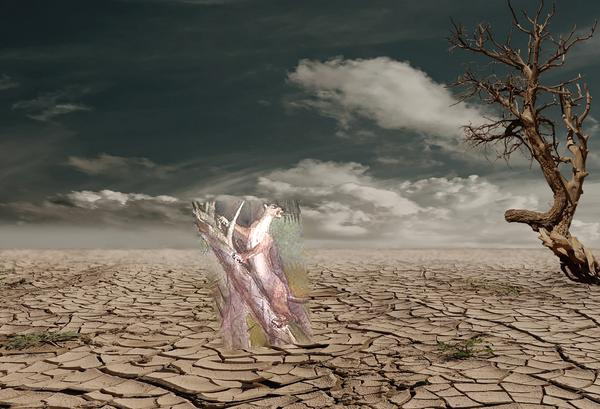

In [83]:
im = Image.open("01-cloning-example3.jpg")
im

# --------------------------------------------------------

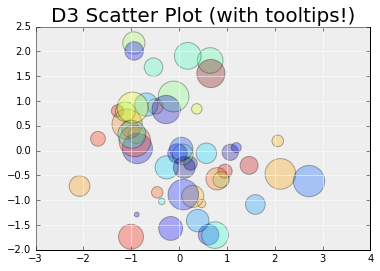

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import mpld3

mpld3.enable_notebook()
from mpld3 import plugins

fig, ax = plt.subplots(subplot_kw=dict(axisbg='#EEEEEE'))
ax.grid(color='white', linestyle='solid')

N = 50
scatter = ax.scatter(np.random.normal(size=N),
                     np.random.normal(size=N),
                     c=np.random.random(size=N),
                     s = 1000 * np.random.random(size=N),
                     alpha=0.3,
                     cmap=plt.cm.jet)

ax.set_title("D3 Scatter Plot (with tooltips!)", size=20)

labels = ['point {0}'.format(i + 1) for i in range(N)]
fig.plugins = [plugins.PointLabelTooltip(scatter, labels)]

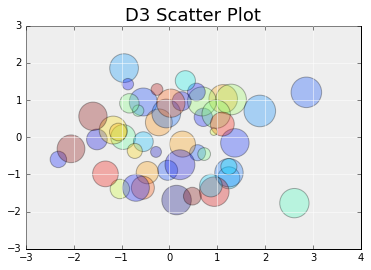

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import mpld3

mpld3.enable_notebook()




fig, ax = plt.subplots(subplot_kw=dict(axisbg='#EEEEEE'))
ax.grid(color='white', linestyle='solid')

N = 50
scatter = ax.scatter(np.random.normal(size=N),
                     np.random.normal(size=N),
                     c=np.random.random(size=N),
                     s = 1000 * np.random.random(size=N),
                     alpha=0.3,
                     cmap=plt.cm.jet)

ax.set_title("D3 Scatter Plot", size=18);

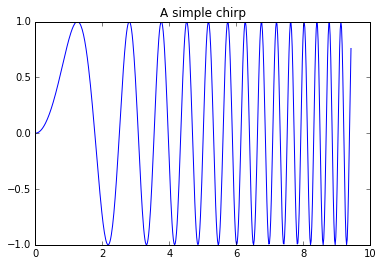

In [74]:
import matplotlib
import numpy as np
from math import sin
import matplotlib.pyplot as plt
%matplotlib inline  

x = np.linspace(0, 3*np.pi, 500)
plt.plot(x, np.sin(x**2))
plt.title('A simple chirp')
plt.show()